In [1]:
import pandas as pd
df = pd.read_fwf(
    'adult.data',header=None)
df.head()


,0,1
0,"39,","State-gov, 77516, Bachelors, 13, Never-married..."
1,"50,","Self-emp-not-inc, 83311, Bachelors, 13, Marrie..."
2,"38,","Private, 215646, HS-grad, 9, Divorced, Handler..."
3,"53,","Private, 234721, 11th, 7, Married-civ-spouse, ..."
4,"28,","Private, 338409, Bachelors, 13, Married-civ-sp..."


## Gini

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=4)   # criterion可設定為entropy, 決策深度設為 4
tree.fit(df[['age','salary']], df[['buy']])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree1.dot", feature_names=['gender','salary'],
                class_names=['0','1'],)

In [10]:
!dot -Tpng tree1.dot -o tree1.png   # need to use a package, conda install graphviz

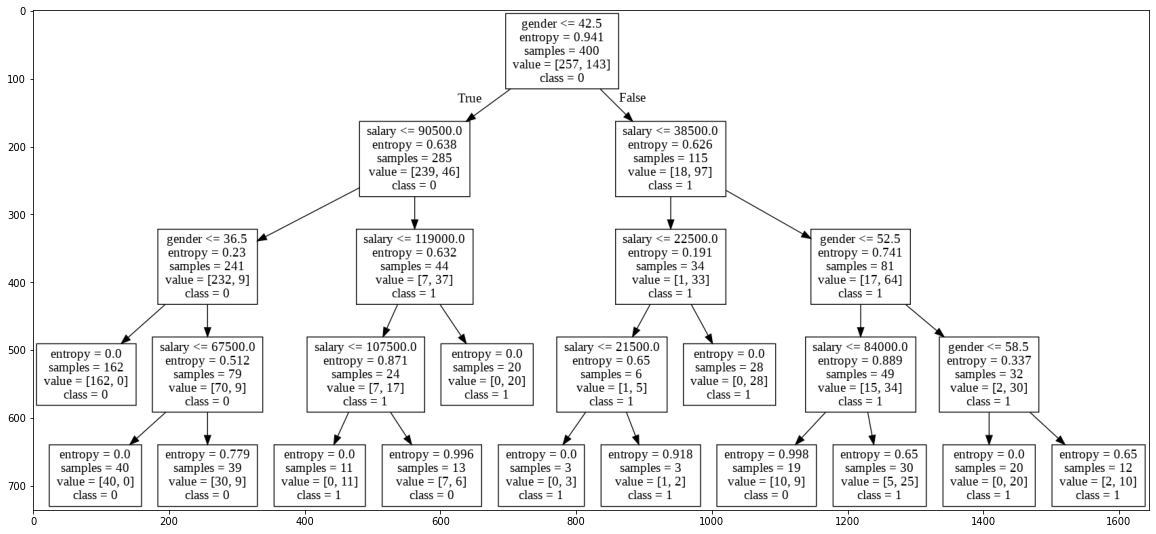

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
img = mpimg.imread('tree1.png')
fig = plt.figure(figsize=(20,18))
plt.imshow(img)

In [16]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['age','salary'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,age,0.515097
1,salary,0.484903


In [ ]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

C:\Users\alung\anaconda3\envs\tf1\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


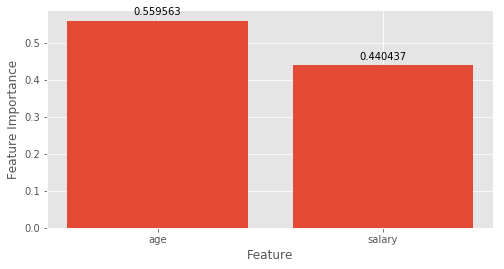

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,4))


gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)

plt.show()

## Entrpoy

In [ ]:
import pandas as pd
df = pd.read_csv("iris.csv",encoding = "big5")
df.head()

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree.fit(df[['花萼長度','花萼寬度']], df[['屬種']])

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['花萼長度','花萼寬度']]
y = df['屬種']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_en.dot", feature_names=['花萼長度','花萼寬度'],
                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'],)

In [ ]:
!dot -Tpng tree_en.dot -o tree_en.png

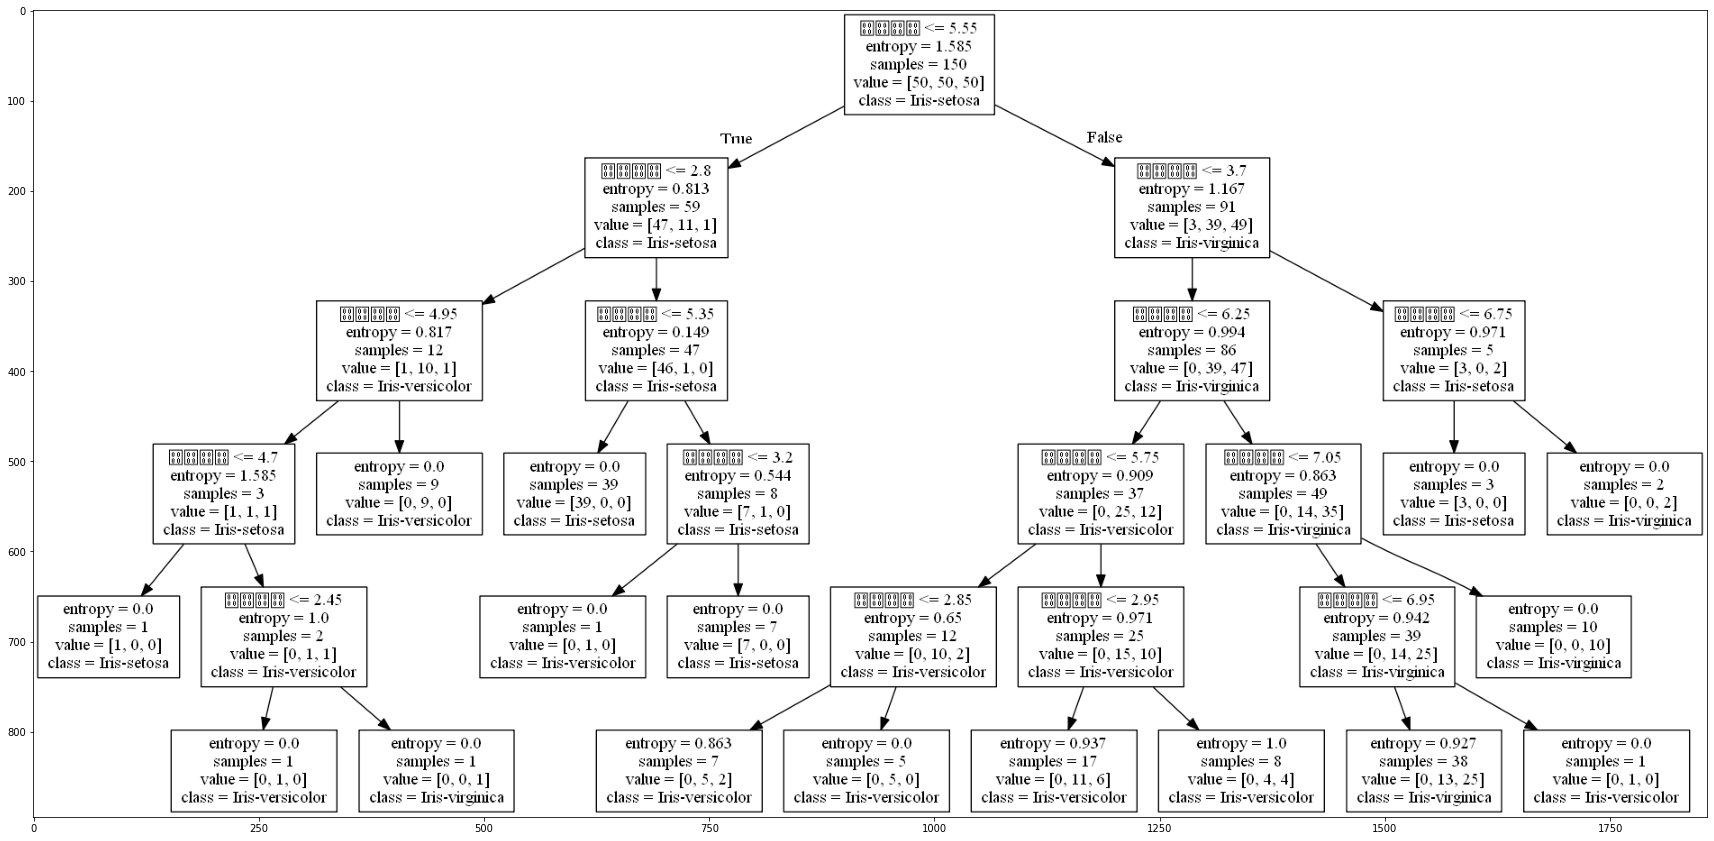

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
img = mpimg.imread('tree_en.png')
fig = plt.figure(figsize=(30,24))
plt.imshow(img)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, tree.predict(X_test)))
print(metrics.confusion_matrix(y_test, tree.predict(X_test),labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.87      0.81      0.84        16
 Iris-virginica       0.77      0.83      0.80        12

       accuracy                           0.89        45
      macro avg       0.88      0.88      0.88        45
   weighted avg       0.89      0.89      0.89        45

[[17  0  0]
 [ 0 13  3]
 [ 0  2 10]]


In [ ]:
tree.feature_importances_.tolist()
df = pd.DataFrame({'feature':['花萼長度','花萼寬度'],'feature_importance':tree.feature_importances_.tolist()})
df = df.sort_values(by=['feature_importance'],ascending=False).reset_index(drop=True)
df

,feature,feature_importance
0,花萼長度,0.678271
1,花萼寬度,0.321729


In [ ]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%f'%float(height),
                ha='center', va='bottom')

C:\Users\alung\anaconda3\envs\tf1\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


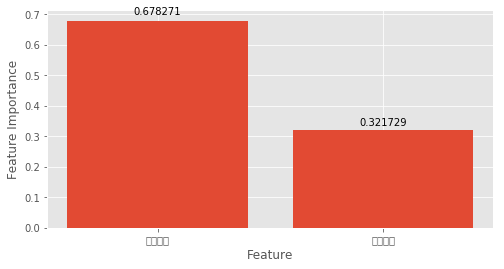

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(figsize=(8,4))


#中文字體 font = matplotlib.font_manager.FontProperties(fname='wt011.ttf')
plt.rcParams['font.family']='SimHei'

gini = plt.bar(df.index,df['feature_importance'],align='center')
plt.xlabel('Feature') #X軸名稱
plt.ylabel('Feature Importance') #Y軸名稱
plt.xticks(df.index, df['feature']) #X軸項目名稱

autolabel(gini)


plt.show()